# Titanic Exercise

to install seaborn :
```bash
conda install -c conda-forge seaborn
````


In [1]:
import pandas as pd
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
embarked_labels = {
  "C": "Cherbourg",
  "Q": "Queenstown",
  "S": "Southampton",
}

In [10]:
# 1. Load the dataset
titanic = load_dataset("titanic")
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
# 2. Data cleaning
# 2.1. Check the missing values
print(titanic.shape)
print(titanic.isnull().sum())

# 2.2. Replace the missing values in age with the mean
# titanic["age"].fillna(titanic["age"].mean(), inplace=True)

# 2.3 rop unused columns
# titanic.drop("deck", axis=1, inplace=True)
# titanic.drop(columns=["deck", "who", "embark_town", "class", "alive"], inplace=True)

# 2.4 drop the rows with missing values in embarked
# titanic.dropna(subset=["embarked"], inplace=True)

# 2.5 Transform month age to 1 year
titanic.age = titanic.age.map(lambda age: 1 if age < 1 else age)

(889, 10)
survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
adult_male    0
alone         0
dtype: int64


In [18]:
print(titanic.shape)
print(titanic.isnull().sum())
titanic.shape

(889, 10)
survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
adult_male    0
alone         0
dtype: int64


(889, 10)

In [30]:
# 3 Analyse data
# 3.1 Calculate the overall survival rate of the Titanic passengersata
survival_rate = titanic["survived"].sum() / titanic.shape[0] * 100
titanic.survived.value_counts(normalize=True)

survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64

<Axes: xlabel='embarked'>

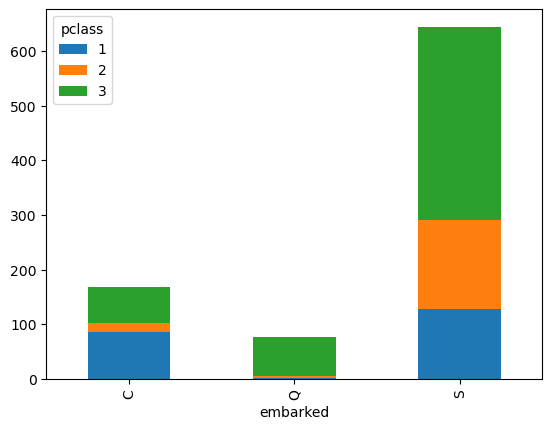

In [110]:
# 3.2 Analyze the distribution of passengers by class (Pclass) and by port of embarkation (Embarked).
# titanic.groupby(["embarked", "pclass"]).survived.count()
# titanic.groupby(["embarked", "pclass"]).survived.count().reset_index().pivot(index="embarked", columns="pclass", values="survived")
pd.crosstab(titanic.embarked, titanic.pclass).plot.bar(stacked=True)

In [39]:
# 3.3 Calculate the proportion of male and female passengers.
# male_passengers = titanic.sex == "male"
# male_passengers.value_counts()
gender_proportion: pd.Series = titanic.sex.value_counts(normalize=True) * 100
gender_proportion

sex
male      64.904387
female    35.095613
Name: proportion, dtype: float64

age
1.0     14
2.0     10
3.0      6
4.0     10
5.0      4
        ..
70.0     2
70.5     1
71.0     2
74.0     1
80.0     1
Name: count, Length: 84, dtype: int64

<Axes: xlabel='age'>

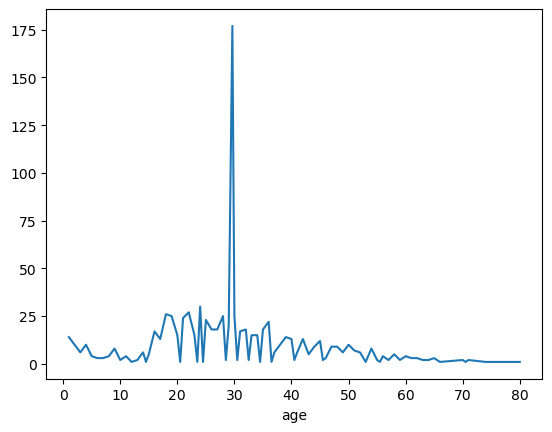

In [47]:
# 3.4 Identify the age distribution of passengers and find the most represented age categories.
display(titanic.age.value_counts().sort_index())
titanic.age.value_counts().sort_index().plot()

In [48]:
category_age = pd.cut(titanic.age, bins=[0, 25, 50, 75, 100], labels=["Jeune", "Adult", "Senior", "Vieux"])
category_age.value_counts()

age
Adult     525
Jeune     301
Senior     62
Vieux       1
Name: count, dtype: int64

age_category
0-11      69
12-17     70
18-29    447
30-49    240
50+       63
Name: count, dtype: int64

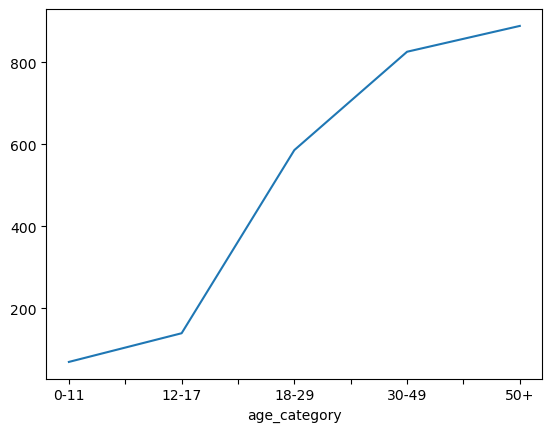

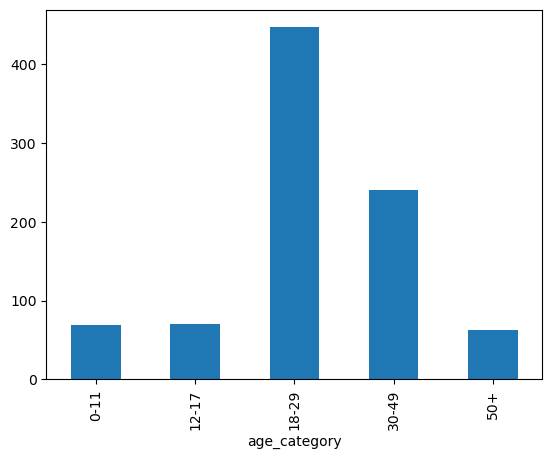

<Axes: xlabel='age_category'>

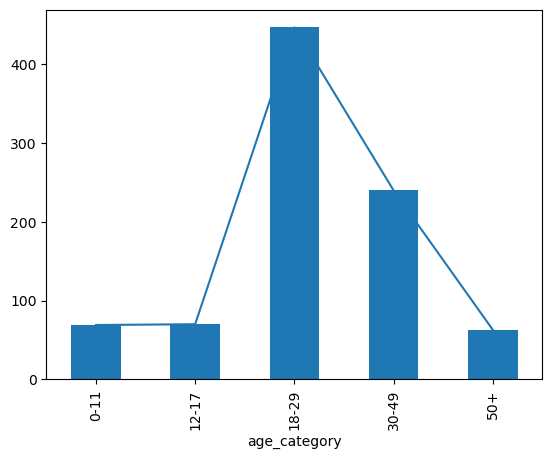

In [56]:
bins: list[int] = [0, 12, 18, 30, 50, 100]
labels: list[str] = ['0-11', '12-17', '18-29', '30-49', '50+']

titanic["age_category"] = pd.cut(titanic.age, bins=bins, labels=labels)
display(titanic.age_category.value_counts().sort_index())
titanic.age_category.value_counts().sort_index().cumsum().plot()
plt.show()
titanic.age_category.value_counts().sort_index().plot(kind="bar")
plt.show()
titanic.age_category.value_counts().sort_index().plot()
titanic.age_category.value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='pclass'>

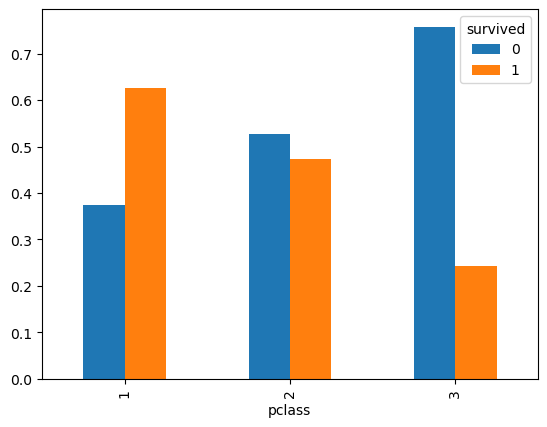

In [62]:
# 4 Alives analyse
# 4.1 Analyze survival based on ticket class (Pclass).
# titanic.groupby("pclass").survived.mean().plot(kind="bar")
titanic.groupby("pclass").survived.value_counts(normalize=True).unstack().plot(kind="bar")

array([<Axes: ylabel='0'>, <Axes: ylabel='1'>], dtype=object)

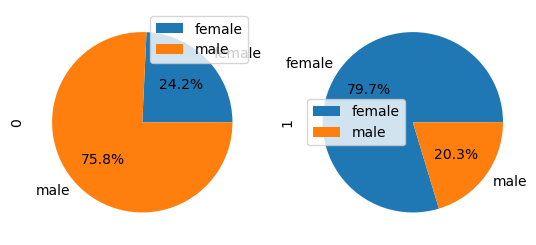

In [74]:
# 4.2 Analyze survival based on gender (Sex).

# survived_male = titanic[(titanic.survived == 1) & (titanic.sex == "male")].shape[0]
# survived_female = titanic[(titanic.survived == 1) & (titanic.sex == "female")].shape[0]
# print(survived_male / titanic.shape[0])
# print(survived_female / titanic.shape[0])

titanic.groupby("sex").survived.value_counts(normalize=True).unstack().plot(kind="pie", subplots=True, autopct="%1.1f%%")

<Axes: xlabel='pclass,sex'>

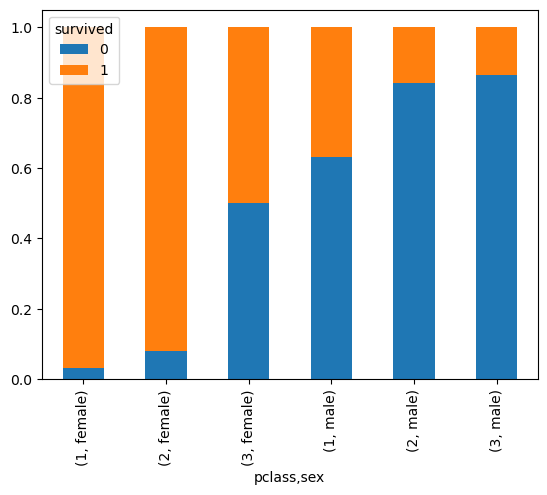

In [85]:
titanic.groupby(["pclass", "sex"]).survived\
  .value_counts(normalize=True).unstack()\
  .sort_index(level=[1], ascending=[True])\
  .plot.bar(stacked=True)